In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

In [4]:
glass_df = pd.read_csv('glass.csv')
glass_df.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Датасет не содержит пропусков.

Посмотрим количество записей для каждого типа целевой переменной


Text(0.5, 1.0, 'Распределение количества записей по типу целевой переменной')

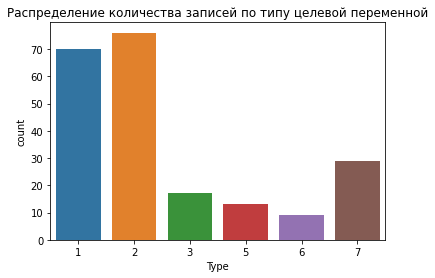

In [155]:
sns.countplot(x='Type', data=glass_df)
plt.title('Распределение количества записей по типу целевой переменной')

In [156]:
glass_df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

Набор данных довольно несбалансирован. Значения типов 1 и 2 составляют более 67 % типов стекла.

Подготовим данные для модели 

In [157]:
X = glass_df.drop(['Type'], axis=1)
X.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


In [158]:
y = glass_df['Type']
y.head(3)

0    1
1    1
2    1
Name: Type, dtype: int64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель дерева решений RandomForestClassifier на обучающем множестве

In [160]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

Посмотрим на точность предсказаний с помощью метрики accuracy

In [162]:
y_pred = clf.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ',  acc)

Accuracy =  0.5581395348837209


Посмотрим на распределение значений для каждой переменной

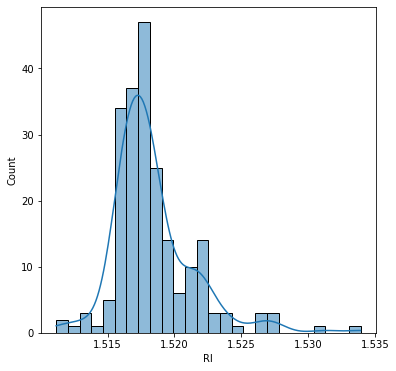

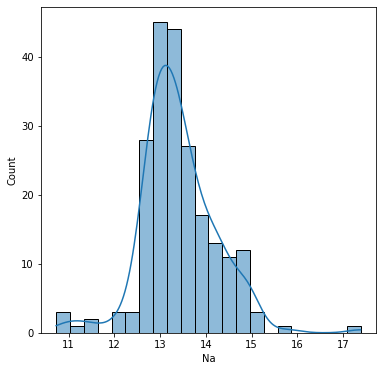

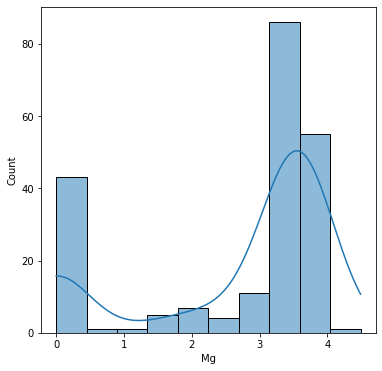

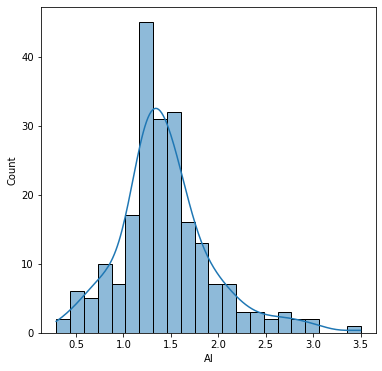

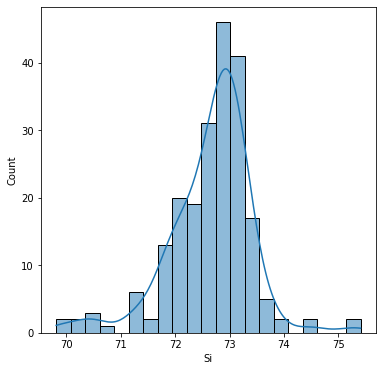

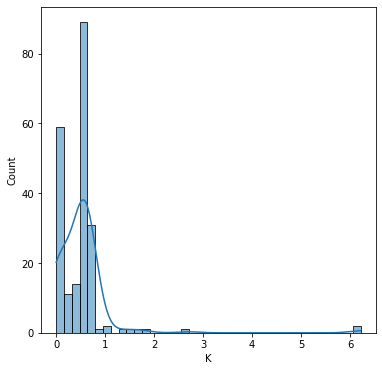

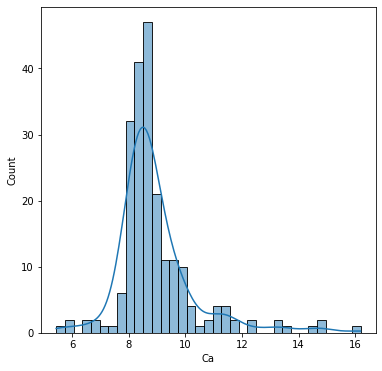

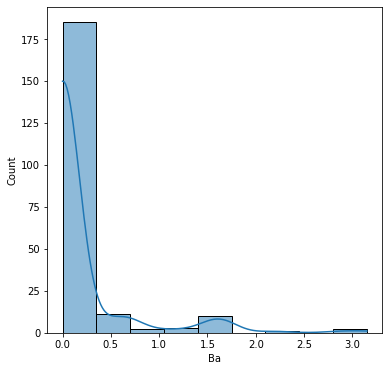

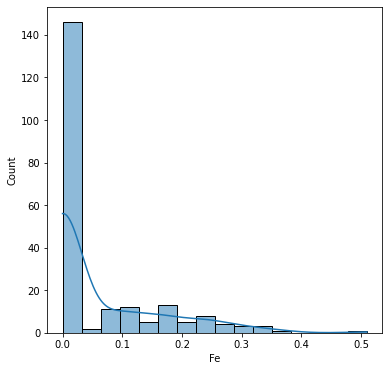

In [166]:
numeric_columns = glass_df.drop(['Type'], axis=1)._get_numeric_data().columns
for i in numeric_columns:
    fig, axes = plt.subplots(figsize=(6,6))
    sns.histplot(glass_df[i],  kde=True)
#     sns.displot(glass_df, x=glass_df[i], kind='kde')
    plt.show()

Ни одна из функций не является нормально распределенной. Признаки Fe, Ba, Ca и K имеют самые высокие коэффициенты асимметрии. Более того, распределение калия (K) и бария (Ba) содержит много выбросов.

Найдем и удалим выбросы в наших данных 

In [167]:
glass_outliers = glass_df[(np.abs(stats.zscore(glass_df)) < 3).all(axis=1)]

In [168]:
glass_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


Подготовим данные для новой модели

In [169]:
X2 = glass_outliers.drop(['Type'], axis=1)
X2.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


In [170]:
y2 = glass_outliers['Type']
y2.head(3)

0    1
1    1
2    1
Name: Type, dtype: int64

In [171]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [172]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X2, y2)
y2_pred = clf.predict(X2_test)
acc2 = sklearn.metrics.accuracy_score(y2_test, y2_pred)
print('Accuracy2 = ',  acc2)

Accuracy2 =  0.717948717948718


#### Вывод:   
В этой работе мы проверили датасет на выбросы визуально и отсортировали их с помощью z score. Построили модель до преобразований данных и после удаления выбросов. Модель с преобразованными данными показала более высокую точность предсказаний. Я думаю, что необхоимо исследовать датасет на выбросы и удалять их . Т.к. выбросы могут привести к неправильно выявленным закономерностям и наша модель будет делать неверные предсказания  